# At what phase of the flight is the most damage occuring?

Compare damage happening within each phase of flight

	#Aircraft_damage
    #Phase_of_Flight

# At what phase of the flight are the most injuries occuring?

Compare each set of injuries with Phase of Flight

	#Total_Fatal_Injuries
	#Total_Serious_Injuries
	#Total_Minor_Injuries
	#Total_Uninjured

	#Injury_severity
    
    Injury severity??
    




## Import Packages and Data

In [1]:
#Import Packages

import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
#Import Data

planes = pd.read_csv('data/Clean_AviationII.csv')

## Inspect Data

In [4]:
#Inspect data
planes.head()

,Event_Id,Accident_Number,Event_Date,Location,Country,Injury_Severity,Aircraft_Damage,Aircraft_Category,Make,Model,...,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Phase_of_Flight,created_year,created_month,created_day,Total_Injuries,Total_Passengers,Make_Model
0,20170710X52551,NYC79AA106,1979-09-17,"BOSTON, MA",United States,Non-Fatal,Substantial,Airplane,Douglas,DC9,...,1.0,44.0,VMC,Climb,1979,9,17,1.0,45.0,Douglas DC9
1,20020909X01562,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,Non-Fatal,Substantial,Airplane,Cessna,140,...,0.0,2.0,VMC,Takeoff,1982,1,1,0.0,2.0,Cessna 140
2,20020909X01561,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,Non-Fatal,Substantial,Airplane,Cessna,401B,...,0.0,2.0,IMC,Landing,1982,1,1,0.0,2.0,Cessna 401B
3,20020917X02148,FTW82FRJ07,1982-01-02,"HOMER, LA",United States,Non-Fatal,Destroyed,Airplane,Bellanca,17-30A,...,1.0,0.0,IMC,Cruise,1982,1,2,1.0,1.0,Bellanca 17-30A
4,20020917X02134,FTW82FRA14,1982-01-02,"HEARNE, TX",United States,Fatal,Destroyed,Airplane,Cessna,R172K,...,0.0,0.0,IMC,Takeoff,1982,1,2,1.0,1.0,Cessna R172K


In [5]:
planes.shape

(16708, 25)

## Check out Phase_of_Flight and Aircraft Damage

In [6]:
planes['Phase_of_Flight'].value_counts()

Unknown        11655
Landing         1858
Takeoff          968
Cruise           692
Approach         492
Maneuvering      377
Taxi             206
Descent          139
Go-around        135
Climb            127
Standing          51
Other              8
Name: Phase_of_Flight, dtype: int64

In [7]:
planes['Aircraft_Damage'].value_counts()

Substantial    13888
Destroyed       1983
Unknown          450
Minor            387
Name: Aircraft_Damage, dtype: int64

## Plot Aircraft Damage by Phase of Flight

In [8]:
planesII = planes.copy()

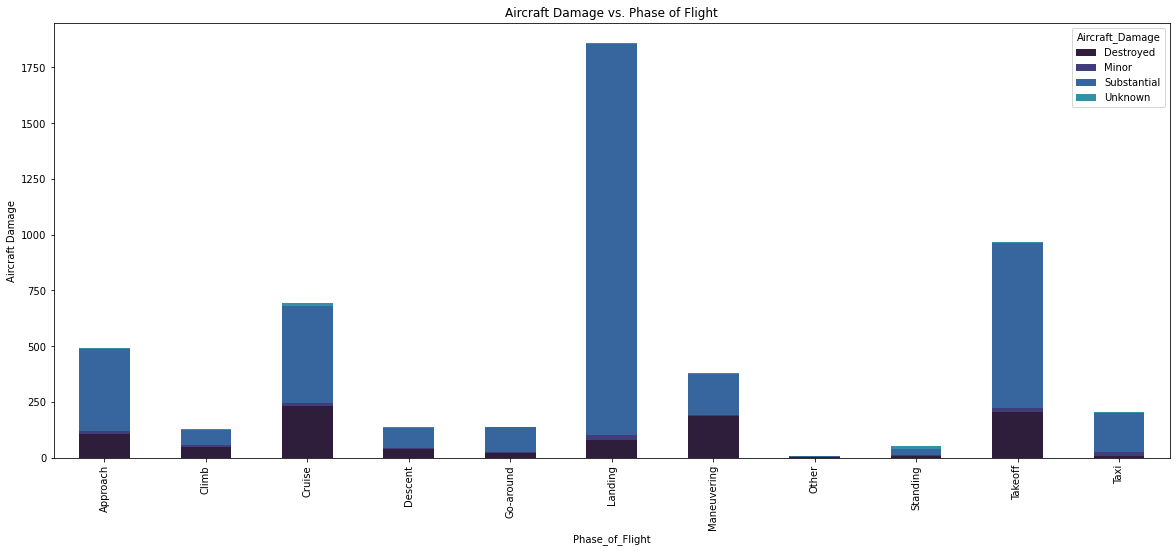

In [9]:
#Should we drop unknown?

noUNK = planes[planes['Phase_of_Flight'] != 'Unknown'] #remove unknowns from data

pohad = noUNK.groupby(['Phase_of_Flight', 'Aircraft_Damage']).size().unstack(fill_value = 0)

fig, ax = plt.subplots(figsize=(20, 8))
sns.set_palette('mako')

plt.xlabel("Phase of Flight")
plt.ylabel("Aircraft Damage")
#plt.xticks(rotation = 45)
plt.title("Aircraft Damage vs. Phase of Flight")

pohad.plot(kind = 'bar', stacked = True, ax = ax);

## observations 
the most damage occurs during landing - mostly substantial
	by substantial, damage prohibits the aircraft from flying -- most damage in landing -perhaps landing gear -- must be fixed before flying again  
the most destroying damage happend on both cruise, takeoff, and maneuvering
no aircrafts (or very little) aircrafts seem to be destroyed during taxi
other seems to be least occuring/unrelevant



In [10]:
#make pivot table - perhaps for csv export?

POH_damage = pd.pivot_table(planesII, columns = ['Aircraft_Damage'], index = 'Phase_of_Flight', aggfunc = 'size')

#convert to dataframe
#
POH_damage_df = POH_damage.reset_index()
POH_damage_df = POH_damage_df.set_index('Phase_of_Flight')

#drop unknown column
POH_damage_df.drop(columns = 'Unknown', inplace = True)

#check
POH_damage_df



Aircraft_Damage,Destroyed,Minor,Substantial
Phase_of_Flight,,,
Approach,105.0,15.0,369.0
Climb,48.0,7.0,67.0
Cruise,229.0,15.0,437.0
Descent,37.0,4.0,90.0
Go-around,22.0,2.0,111.0
Landing,79.0,21.0,1756.0
Maneuvering,188.0,3.0,185.0
Other,3.0,NaN,5.0
Standing,6.0,5.0,29.0


## Plot Injuries by Phase of Flight

In [11]:
#make total injuries column
planes['Total_Injuries'] = (planes['Total_Fatal_Injuries'] + 
                                  planes['Total_Minor_Injuries'] +
                                 planes['Total_Serious_Injuries'])

#check
planes.head()

,Event_Id,Accident_Number,Event_Date,Location,Country,Injury_Severity,Aircraft_Damage,Aircraft_Category,Make,Model,...,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Phase_of_Flight,created_year,created_month,created_day,Total_Injuries,Total_Passengers,Make_Model
0,20170710X52551,NYC79AA106,1979-09-17,"BOSTON, MA",United States,Non-Fatal,Substantial,Airplane,Douglas,DC9,...,1.0,44.0,VMC,Climb,1979,9,17,1.0,45.0,Douglas DC9
1,20020909X01562,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,Non-Fatal,Substantial,Airplane,Cessna,140,...,0.0,2.0,VMC,Takeoff,1982,1,1,0.0,2.0,Cessna 140
2,20020909X01561,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,Non-Fatal,Substantial,Airplane,Cessna,401B,...,0.0,2.0,IMC,Landing,1982,1,1,0.0,2.0,Cessna 401B
3,20020917X02148,FTW82FRJ07,1982-01-02,"HOMER, LA",United States,Non-Fatal,Destroyed,Airplane,Bellanca,17-30A,...,1.0,0.0,IMC,Cruise,1982,1,2,1.0,1.0,Bellanca 17-30A
4,20020917X02134,FTW82FRA14,1982-01-02,"HEARNE, TX",United States,Fatal,Destroyed,Airplane,Cessna,R172K,...,0.0,0.0,IMC,Takeoff,1982,1,2,1.0,1.0,Cessna R172K


In [12]:
#Should we group this in any way?
#planesII['Total_Injuries'] = planes['Total_Injuries'].value_counts().loc[lambda x: x > 5]


planesII['Total_Injuries'].value_counts()

0.0      10472
1.0       3115
2.0       1895
3.0        544
4.0        378
5.0        117
6.0         58
7.0         36
8.0         17
10.0        16
9.0         14
12.0         7
11.0         3
28.0         2
13.0         2
26.0         2
33.0         2
113.0        2
75.0         2
14.0         1
66.0         1
134.0        1
88.0         1
104.0        1
30.0         1
254.0        1
380.0        1
96.0         1
164.0        1
17.0         1
65.0         1
35.0         1
200.0        1
44.0         1
190.0        1
22.0         1
171.0        1
27.0         1
131.0        1
42.0         1
21.0         1
157.0        1
85.0         1
Name: Total_Injuries, dtype: int64

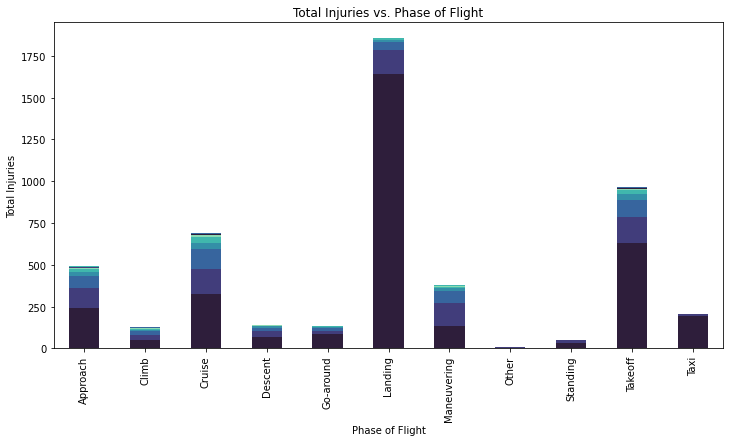

In [13]:
#plot injuries by phase of flight
noUNK = planes[planes['Phase_of_Flight'] != 'Unknown'] #remove unknowns from data

pohti = noUNK.groupby(['Phase_of_Flight', 'Total_Injuries']).size().unstack(fill_value = 0)

fig, ax = plt.subplots(figsize= (12, 6))

pohti.plot(kind = 'bar', stacked = True, ax = ax, legend = None);

plt.xlabel("Phase of Flight")
plt.ylabel("Total Injuries")
#plt.xticks(rotation = 45)
plt.title("Total Injuries vs. Phase of Flight");

#make 4 subplots?

## Aircraft Make by Injuries

In [14]:
planesII['Total_Injuries'].value_counts()

0.0      10472
1.0       3115
2.0       1895
3.0        544
4.0        378
5.0        117
6.0         58
7.0         36
8.0         17
10.0        16
9.0         14
12.0         7
11.0         3
28.0         2
13.0         2
26.0         2
33.0         2
113.0        2
75.0         2
14.0         1
66.0         1
134.0        1
88.0         1
104.0        1
30.0         1
254.0        1
380.0        1
96.0         1
164.0        1
17.0         1
65.0         1
35.0         1
200.0        1
44.0         1
190.0        1
22.0         1
171.0        1
27.0         1
131.0        1
42.0         1
21.0         1
157.0        1
85.0         1
Name: Total_Injuries, dtype: int64

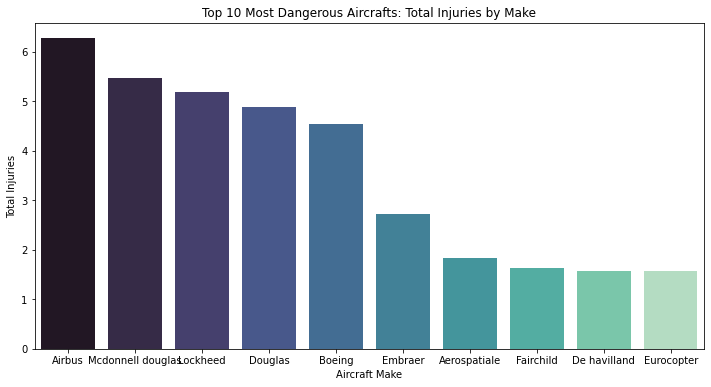

In [15]:
#most dangerous pivot table
Inj_Make_Pivot = pd.pivot_table(planesII, values = ['Total_Injuries'], index = 'Make')
sorted_IM_Pivot = Inj_Make_Pivot.apply(lambda x: x.sort_values(ascending = False).head(10))

#create dataframe from pivot table
DangerMake = {
    'Make': ['Airbus', 'Mcdonnell douglas', 'Lockheed', 'Douglas', 
             'Boeing', 'Embraer', 'Aerospatiale', 'Fairchild', 'De havilland', 'Eurocopter'],
    'Total_Injuries': [6.277978, 5.475379, 5.187500, 4.893939, 4.540573, 2.721212, 
                       1.843666, 1.632653, 1.577608, 1.564767]
}
plt.figure(figsize=(12,6))
sns.barplot(x = 'Make', y = 'Total_Injuries', data = DangerMake, palette = 'mako')
plt.xlabel('Aircraft Make')
plt.ylabel('Total Injuries')
plt.title('Top 10 Most Dangerous Aircrafts: Total Injuries by Make');

#add values if easy

#combine the mcdonnell and douglas

Observations: Across the data, Airbus had the highest average injuries of 6.277
	the highest averages seem to be popular aircraft companies/larger airplanes. That may accounts for the skew for higher total average 
    	eurocopter = airbus but still in data? need clarification on what model is (cause for further investigation)


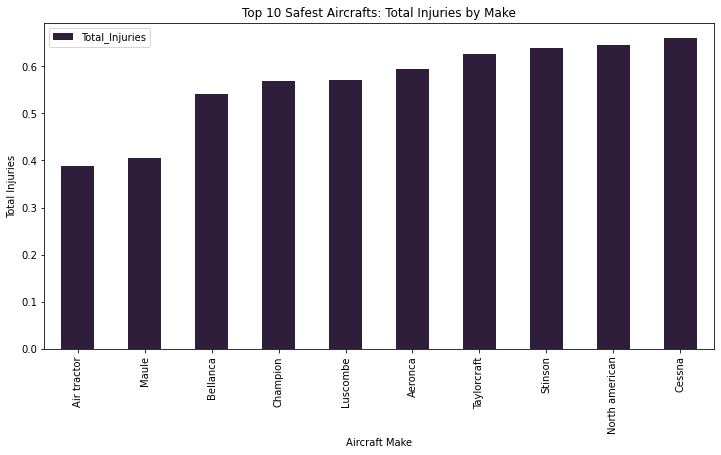

In [16]:
#least dangerous pivot table
least_injured = pd.pivot_table(planesII, values = ['Total_Injuries'], index = 'Make')
sorted_least_injured = least_injured.apply(lambda x: x.sort_values(ascending = True).head(10))
sorted_least_injured

#create dataframe from pivot table

least_inj_df = sorted_least_injured.reset_index()
least_inj_df = least_inj_df.set_index('Make')



fix, ax = plt.subplots(figsize=(12,6))
sns.set_palette = 'mako'

least_inj_df.plot(kind = 'bar', stacked = False, ax = ax)

plt.xlabel('Aircraft Make')
plt.ylabel('Total Injuries')
plt.title('Top 10 Safest Aircrafts: Total Injuries by Make');
#plt.xticks(rotation=45);

Observations: 
    Grummen-schwelzer with the least amount of injuries
    difference between top 10 and bottom 10 is > 5 average injuries
    Air tractor = farming plane not passenger plane
    these aircraft companies could make smaller passenger planes overall which account for their low average injuries
    Some helicopter companies in the mix

## Aircraft Damage by Aircraft Make

In [17]:
planesII.head()

,Event_Id,Accident_Number,Event_Date,Location,Country,Injury_Severity,Aircraft_Damage,Aircraft_Category,Make,Model,...,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Phase_of_Flight,created_year,created_month,created_day,Total_Injuries,Total_Passengers,Make_Model
0,20170710X52551,NYC79AA106,1979-09-17,"BOSTON, MA",United States,Non-Fatal,Substantial,Airplane,Douglas,DC9,...,1.0,44.0,VMC,Climb,1979,9,17,1.0,45.0,Douglas DC9
1,20020909X01562,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,Non-Fatal,Substantial,Airplane,Cessna,140,...,0.0,2.0,VMC,Takeoff,1982,1,1,0.0,2.0,Cessna 140
2,20020909X01561,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,Non-Fatal,Substantial,Airplane,Cessna,401B,...,0.0,2.0,IMC,Landing,1982,1,1,0.0,2.0,Cessna 401B
3,20020917X02148,FTW82FRJ07,1982-01-02,"HOMER, LA",United States,Non-Fatal,Destroyed,Airplane,Bellanca,17-30A,...,1.0,0.0,IMC,Cruise,1982,1,2,1.0,1.0,Bellanca 17-30A
4,20020917X02134,FTW82FRA14,1982-01-02,"HEARNE, TX",United States,Fatal,Destroyed,Airplane,Cessna,R172K,...,0.0,0.0,IMC,Takeoff,1982,1,2,1.0,1.0,Cessna R172K


In [18]:
#most dangerous pivot table
most_damage = pd.pivot_table(planesII, columns = ['Aircraft_Damage'], index = 'Make', aggfunc = 'size')

#convert to dataframe
most_damage_df = most_damage.reset_index()
most_damage_df = most_damage_df.set_index('Make')
most_damage_df[["Destroyed","Minor","Substantial"]] = most_damage_df[["Destroyed","Minor","Substantial"]].fillna(0)

#drop unknown column
most_damage_df.drop(columns = 'Unknown', inplace = True)


#create top 10 and bottom 10


#normalize columns


#create normalized total column


#check
most_damage_df.head()

Aircraft_Damage,Destroyed,Minor,Substantial
Make,,,
Aero commander,17.0,0.0,76.0
Aeronca,14.0,4.0,187.0
Air tractor,46.0,4.0,326.0
Airbus,6.0,27.0,14.0
Beech,255.0,36.0,1138.0


Text(0.5, 1.0, 'Aircraft Damage by Make')

<Figure size 864x576 with 0 Axes>

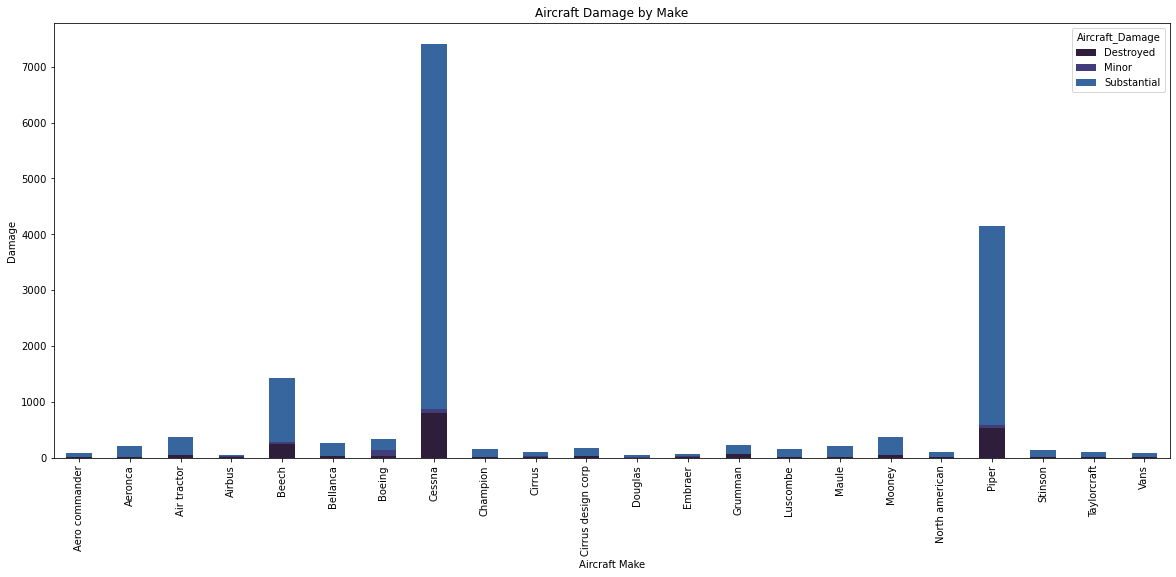

In [19]:
# plot 

plt.figure(figsize=(12,8))

ax = most_damage_df.plot(kind = 'bar', stacked = True, figsize = (20,8))
plt.xlabel('Aircraft Make')
plt.ylabel('Damage')
plt.title('Aircraft Damage by Make')
#sns.set_palette('mako');

#plt.xticks(rotation=45);

Observations:
    Cessna and Piper have the highest number of damage reports

# Safety Scoring

In [20]:
#Copy Planes for the purposes of trying things
planesII = planes.copy()

In [21]:
planesII.head()
planesII['Injury_Severity'].value_counts()
planesII['Model'].value_counts()

172          744
152          416
172N         301
182          286
172S         258
            ... 
C-50           1
777-222B       1
PA-30 B        1
VANS RV 9      1
65-TF          1
Name: Model, Length: 1828, dtype: int64

In [25]:
#points dictionary
#weather = {'IMC': 2, 'VCM': 1}
#engine = {most risky engine to least risky engine}
#severity = {'Fatal': 5, 'Serious': 4, 'Incident': 3, 'Minor': 2, 'Non-Fatal': 1}
#damage = {'Destroyed': 3, 'Substantial': 2, 'Minor': 1}


makes = planesII['Make'].value_counts()
makes

Cessna                7478
Piper                 4170
Beech                 1446
Boeing                 540
Air tractor            377
Mooney                 369
Bellanca               268
Grumman                233
Maule                  217
Aeronca                205
Cirrus design corp     182
Champion               158
Luscombe               154
Stinson                138
Airbus                 119
North american         104
Taylorcraft            104
Cirrus                 102
Aero commander          94
Embraer                 94
Vans                    85
Douglas                 71
Name: Make, dtype: int64

In [ ]:
makes =planesII['Make'].value_counts()

makes = df[df['Make'].isin(top_models.index)][['Make', 'Total_Injuries', 'Total_Passengers']]
model_df

model_df = make_df = df.groupby(['Make_Model'])[ 'Total_Injuries', 'Total_Passengers'].sum().nlargest(20, 
    columns=['Total_Injuries', 'Total_Passengers'])
model_df

model_df['Survival_Rate'] = 1 - (model_df['Total_Injuries']/ model_df['Total_Passengers'])
model_df = model_df.drop(columns= ['Total_Injuries', 'Total_Passengers'])
model_df

#injury rate 
#injury:Survival ratio

In [ ]:
#apply point system to injury severity and damage columns, create safety score
planesII['Damage_Score'] = planesII['Aircraft_Damage'].map(damage)
planesII['Injury_Score'] = planesII['Injury_Severity'].map(severity)
planesII['Weather_Score'] = planesII['Weather --'].map(weather)
planesII['Engine_Score'] = planesII['Engine--'].map(engine)

planesII['Safety_Score'] = planesII['Injury_Score'] + planesII['Damage_Score']

#should we normalize other damage and injury scores?

#check
planesII.head()

In [117]:
#Delete all unavailable rows?
planesII = planesII[planesII["Injury_Severity"] != 'Unavailable']